# 1) Prepare a classification model using SVM for salary data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
traindata=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Support Vector Machine\\SalaryData_Train(1).csv")

In [3]:
traindata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
testdata=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Support Vector Machine\\SalaryData_Test(1).csv")

In [5]:
testdata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
traindata.shape,testdata.shape

((30161, 14), (15060, 14))

In [7]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
traindata.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
testdata.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
traindata.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
testdata.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
traindata.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [14]:
traindata.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [15]:
traindata.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [16]:
traindata.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
testdata.workclass.value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [18]:
testdata.education.value_counts()

 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

In [19]:
testdata.maritalstatus.value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [20]:
testdata.occupation.value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='count'>

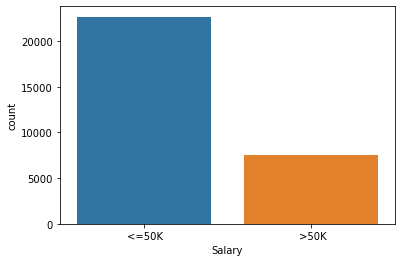

In [21]:
sns.countplot(x="Salary",data=traindata)

<AxesSubplot:xlabel='Salary', ylabel='count'>

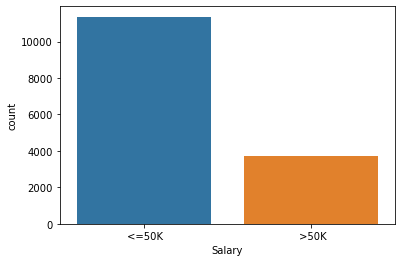

In [22]:
sns.countplot(x="Salary",data=testdata)

<AxesSubplot:xlabel='workclass', ylabel='count'>

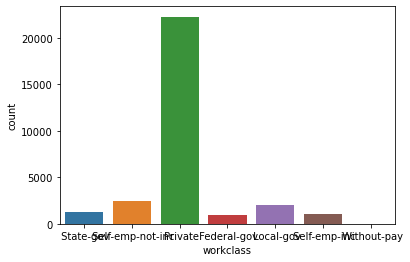

In [23]:
sns.countplot(x="workclass",data=traindata)

<AxesSubplot:xlabel='workclass', ylabel='count'>

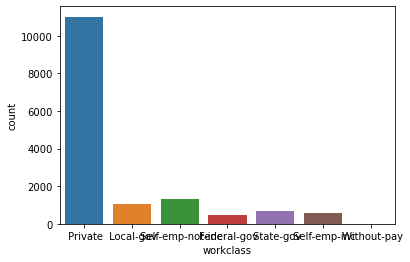

In [24]:
sns.countplot(x="workclass",data=testdata)

<AxesSubplot:xlabel='education', ylabel='count'>

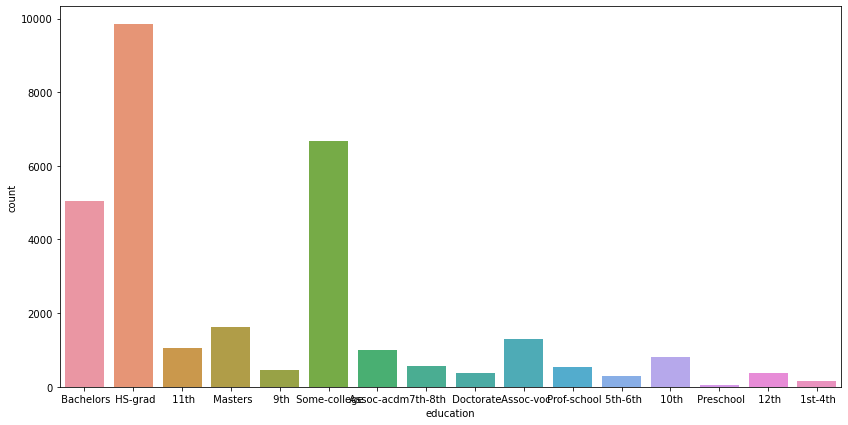

In [25]:
plt.figure(figsize=(14,7))
sns.countplot(x="education",data=traindata)

<AxesSubplot:xlabel='education', ylabel='count'>

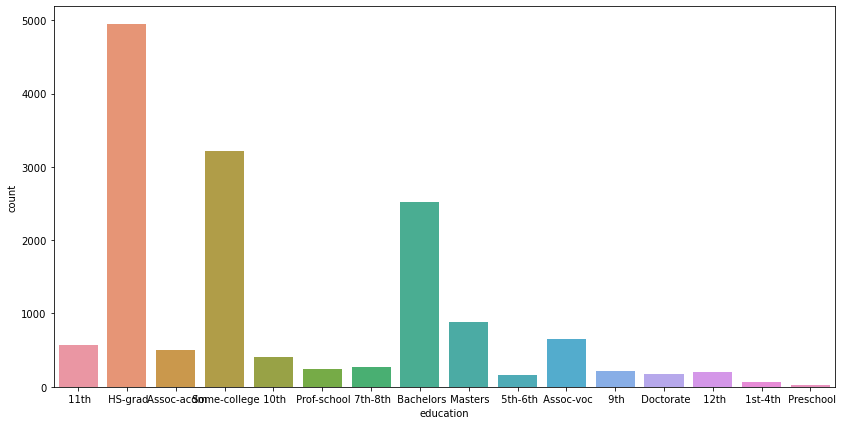

In [26]:
plt.figure(figsize=(14,7))
sns.countplot(x="education",data=testdata)

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

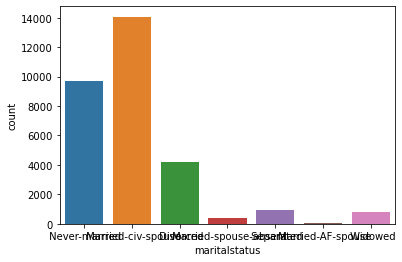

In [27]:
sns.countplot(x="maritalstatus",data=traindata)

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

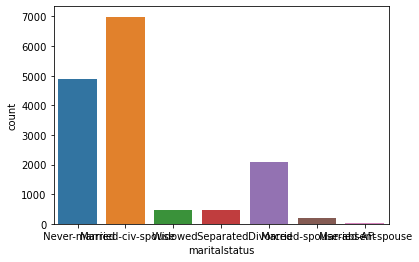

In [28]:
sns.countplot(x="maritalstatus",data=testdata)

<AxesSubplot:xlabel='occupation', ylabel='count'>

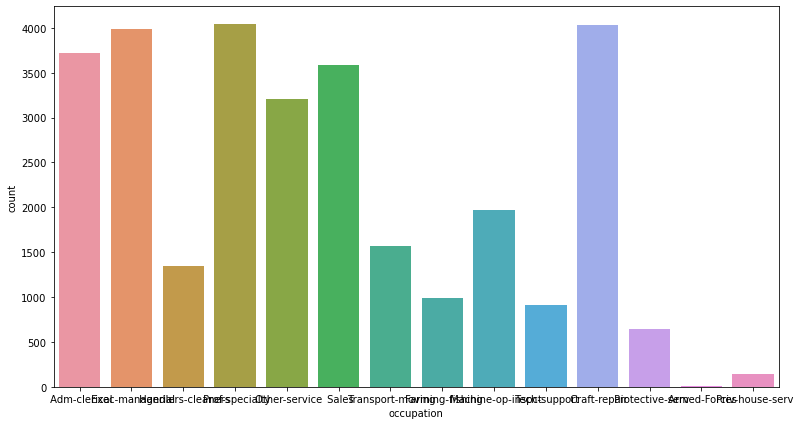

In [29]:
plt.figure(figsize=(13,7))
sns.countplot(x="occupation",data=traindata)

<AxesSubplot:xlabel='occupation', ylabel='count'>

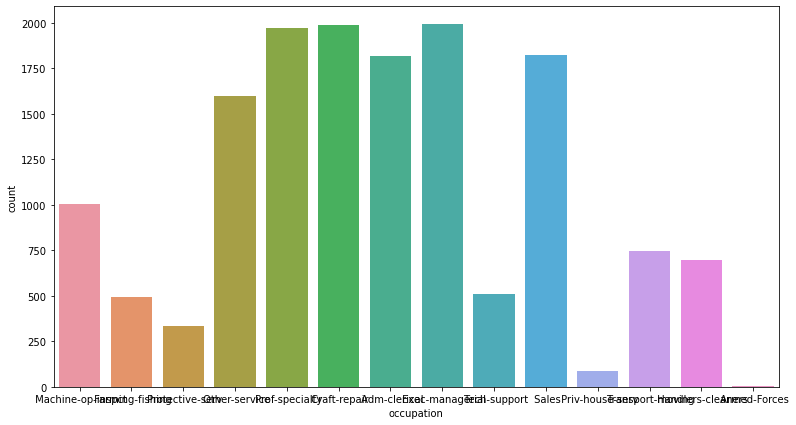

In [30]:
plt.figure(figsize=(13,7))
sns.countplot(x="occupation",data=testdata)

<AxesSubplot:xlabel='sex', ylabel='count'>

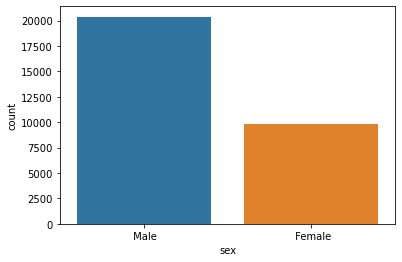

In [31]:
sns.countplot(x="sex",data=traindata)

<AxesSubplot:xlabel='sex', ylabel='count'>

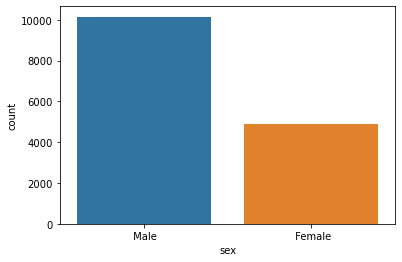

In [32]:
sns.countplot(x="sex",data=testdata)

<AxesSubplot:xlabel='age', ylabel='education'>

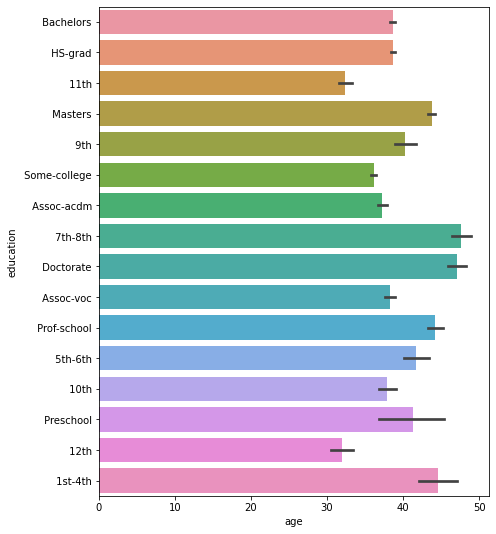

In [33]:
plt.figure(figsize=(7,9))
sns.barplot(x="age",y="education",data=traindata)

<AxesSubplot:xlabel='age', ylabel='education'>

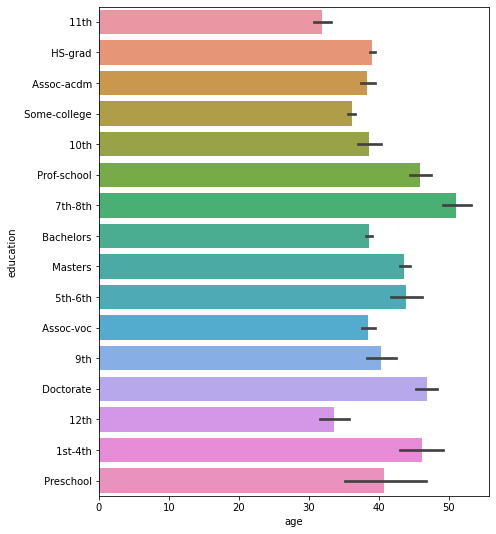

In [34]:
plt.figure(figsize=(7,9))
sns.barplot(x="age",y="education",data=testdata)

In [35]:
traindata.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [36]:
traindata.drop(columns=["educationno","relationship","race","capitalgain","capitalloss"],axis=1,inplace=True)

In [37]:
testdata.drop(columns=["educationno","relationship","race","capitalgain","capitalloss"],axis=1,inplace=True)

In [38]:
traindata.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation', 'sex',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [39]:
traindata.head()

,age,workclass,education,maritalstatus,occupation,sex,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,40,Cuba,<=50K


In [40]:
x_train=traindata.drop(columns="Salary",axis=1)
y_train=traindata[["Salary"]]

In [41]:
x_test=testdata.drop(columns="Salary",axis=1)
y_test=testdata[["Salary"]]

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
label=LabelEncoder()

In [44]:
col=x_train.columns.drop(labels="age")

In [45]:
col

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'sex',
       'hoursperweek', 'native'],
      dtype='object')

In [46]:
for i in col:
    x_train[i]=label.fit_transform(x_train[i])
    x_test[i]=label.fit_transform(x_test[i])

In [47]:
x_train.head()

,age,workclass,education,maritalstatus,occupation,sex,hoursperweek,native
0,39,5,9,4,0,1,39,37
1,50,4,9,2,3,1,12,37
2,38,2,11,0,5,1,39,37
3,53,2,1,2,5,1,39,37
4,28,2,9,2,9,0,39,4


In [48]:
x_test.head()

,age,workclass,education,maritalstatus,occupation,sex,hoursperweek,native
0,25,2,1,4,6,1,39,37
1,38,2,11,2,4,1,49,37
2,28,1,7,2,10,1,39,37
3,44,2,15,2,6,1,39,37
4,34,2,0,4,7,1,29,37


In [49]:
#model building
from sklearn.svm import SVC


In [50]:
linear_model=SVC(kernel="linear")

In [51]:
linear_model.fit(x_train,y_train)

SVC(kernel='linear')

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
y_train_pred_ln=linear_model.predict(x_train)

In [54]:
y_test_pred_ln=linear_model.predict(x_test)

In [55]:
accuracy_score(y_train,y_train_pred_ln)

0.7510692616292564

In [56]:
accuracy_score(y_test,y_test_pred_ln)

0.7543160690571049

In [57]:
confusion_matrix(y_test,y_test_pred_ln)

array([[11360,     0],
       [ 3700,     0]], dtype=int64)

In [58]:
print(classification_report(y_test,y_test_pred_ln))

              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86     11360
        >50K       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



In [59]:
poly_model=SVC(kernel="poly",random_state=3)

In [60]:
poly_model.fit(x_train,y_train)

SVC(kernel='poly', random_state=3)

In [61]:
y_train_pred_poly=poly_model.predict(x_train)

In [62]:
y_test_pred_poly=poly_model.predict(x_test)

In [63]:
accuracy_score(y_train,y_train_pred_poly)

0.7510692616292564

In [64]:
accuracy_score(y_test,y_test_pred_poly)

0.7543160690571049

In [65]:
confusion_matrix(y_test,y_test_pred_poly)

array([[11360,     0],
       [ 3700,     0]], dtype=int64)